In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (confusion_matrix, classification_report)
from sklearn.preprocessing import (StandardScaler, OneHotEncoder)
from sklearn.model_selection import train_test_split as split

from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('whitegrid')

## Load Data:

In [2]:
data = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
data.head(10)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
7,1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
8,1,female,4.0,1,1,16.7000,Third,G,Southampton,n
9,0,male,20.0,0,0,8.0500,Third,unknown,Southampton,y


In [3]:
data.isna().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

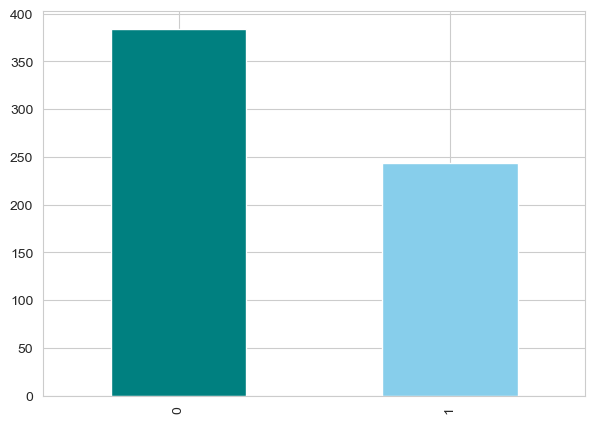

In [4]:
# -- survived is our target variable for this project
# -- we will train a model to predict the survial of an individual get the training data.
# -- Classification Model: KNN (k-nearest neighbhors)
# -- First check the survived variable.
# 0 = No, 1 = yes : Survived
data.survived.value_counts().plot.bar(color=['teal', 'skyblue'], figsize=(7, 5));

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [6]:
target = data.pop("survived")
inputs = data.copy()

In [7]:
inputs.shape

(627, 9)

## Split the dataset:

In [8]:
train_inputs, test_inputs, train_target, test_target = split(inputs, target, test_size=.20, random_state=42)

In [9]:
train_inputs.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
332,male,48.0,0,0,26.5500,First,E,Southampton,y
6,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
104,male,37.0,1,0,53.1000,First,C,Southampton,n
114,male,40.5,0,2,14.5000,Third,unknown,Southampton,n
482,male,36.0,0,1,512.3292,First,B,Cherbourg,n


In [10]:
train_inputs.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [11]:
test_inputs.embark_town.unique()

array(['Southampton', 'Queenstown', 'Cherbourg'], dtype=object)

In [12]:
train_inputs.embark_town.value_counts()

Southampton    350
Cherbourg      109
Queenstown      41
unknown          1
Name: embark_town, dtype: int64

In [13]:
train_inputs.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [14]:
train_inputs.embark_town = train_inputs.embark_town.str.replace('unknown', "Southampton")
train_inputs.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [15]:
train_inputs['deck'].value_counts()

unknown    378
C           38
B           33
E           19
D           15
A           10
G            4
F            4
Name: deck, dtype: int64

In [16]:
train_inputs.head(10)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
332,male,48.0,0,0,26.5500,First,E,Southampton,y
6,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
104,male,37.0,1,0,53.1000,First,C,Southampton,n
114,male,40.5,0,2,14.5000,Third,unknown,Southampton,n
482,male,36.0,0,1,512.3292,First,B,Cherbourg,n
184,male,30.0,1,0,16.1000,Third,unknown,Southampton,n
322,male,28.0,0,0,8.1125,Third,unknown,Southampton,y
514,male,25.0,1,0,26.0000,Second,unknown,Southampton,n
431,male,36.0,1,0,15.5500,Third,unknown,Southampton,n
451,male,32.0,0,0,30.5000,First,B,Cherbourg,y


In [17]:
train_inputs.sex = train_inputs.sex.map({'male': 0, 'female': 1})
train_inputs.alone.replace(['y', 'n'], [0, 1], inplace=True)
train_inputs['class'].replace(['First', 'Second', 'Third'], [1, 2, 3], inplace=True)
# ------
test_inputs.sex.replace(['male', 'female'], [0, 1], inplace=True)
test_inputs.alone.replace(['y', 'n'], [0, 1], inplace=True)
test_inputs['class'].replace(['First', 'Second', 'Third'], [1, 2, 3], inplace=True)

In [18]:
train_inputs.drop(columns=['embark_town', 'deck'], inplace=True)
test_inputs.drop(columns=['embark_town', 'deck'], inplace=True)

In [19]:
train_inputs.sample(10)

,sex,age,n_siblings_spouses,parch,fare,class,alone
124,1,28.0,0,1,55.0000,1,1
254,0,28.0,0,0,7.2250,3,0
151,0,32.0,1,0,15.8500,3,1
246,0,28.0,0,0,13.0000,2,0
222,0,30.0,1,0,24.0000,2,1
279,0,28.0,0,0,7.7292,3,0
184,0,30.0,1,0,16.1000,3,1
574,0,28.0,0,0,0.0000,1,0
447,0,26.0,0,0,7.8958,3,0
66,0,28.0,0,0,47.1000,1,0


In [20]:
test_inputs.sample(10)

,sex,age,n_siblings_spouses,parch,fare,class,alone
557,0,25.0,0,0,7.8958,3,0
586,0,23.0,0,0,7.8542,3,0
261,0,29.0,1,0,27.7208,2,1
582,0,28.0,0,0,56.4958,3,0
145,1,28.0,0,0,7.7500,3,0
286,1,31.0,0,0,7.8542,3,0
334,0,47.0,0,0,38.5000,1,0
601,1,16.0,0,1,39.4000,1,1
305,0,21.0,0,0,7.7333,3,0
487,0,19.0,0,0,10.1708,3,0


In [21]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 332 to 102
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 501 non-null    int64  
 1   age                 501 non-null    float64
 2   n_siblings_spouses  501 non-null    int64  
 3   parch               501 non-null    int64  
 4   fare                501 non-null    float64
 5   class               501 non-null    int64  
 6   alone               501 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 31.3 KB


## Scalling all the variables:

In [22]:
def normalize_(data: pd.DataFrame, scaler) -> pd.DataFrame:
    """ returns noramlized numerical pandas dataframe. """
    num_cols = data.select_dtypes(include=np.number).columns.to_list()
    scaler_ = scaler().fit(data[num_cols])
    data[num_cols] = scaler_.transform(data[num_cols])
    return data[num_cols]

In [23]:
normalize_(train_inputs, StandardScaler)

,sex,age,n_siblings_spouses,parch,fare,class,alone
332,-0.723047,1.418764,-0.506852,-0.498883,-0.158453,-1.462324,-0.821940
6,1.383037,-0.209704,-0.506852,2.160056,-0.425012,0.867165,1.216634
104,-0.723047,0.565757,0.485073,-0.498883,0.300603,-1.462324,1.216634
114,-0.723047,0.837168,-0.506852,2.160056,-0.366801,0.867165,1.216634
482,-0.723047,0.488211,-0.506852,0.830587,8.240794,-1.462324,1.216634
...,...,...,...,...,...,...,...
71,-0.723047,1.263672,0.485073,-0.498883,0.440222,-1.462324,1.216634
106,-0.723047,-0.442343,-0.506852,-0.498883,0.751879,-1.462324,-0.821940
270,-0.723047,-0.830073,-0.506852,-0.498883,-0.478323,0.867165,-0.821940
435,1.383037,0.798395,-0.506852,-0.498883,2.035897,-1.462324,-0.821940


In [24]:
normalize_(test_inputs, StandardScaler)

,sex,age,n_siblings_spouses,parch,fare,class,alone
580,-0.745356,-2.533869,2.090523,0.645088,0.275676,0.741362,1.173609
590,-0.745356,-0.124303,-0.430108,-0.424400,-0.548207,0.741362,-0.852072
550,-0.745356,-0.402330,-0.430108,-0.424400,-0.574248,0.741362,-0.852072
213,-0.745356,-0.495005,-0.430108,-0.424400,-0.552223,0.741362,-0.852072
485,-0.745356,-1.421761,2.720680,1.714576,0.463499,0.741362,1.173609
...,...,...,...,...,...,...,...
535,-0.745356,-0.124303,-0.430108,-0.424400,-0.380240,0.741362,-0.852072
319,1.341641,1.451182,0.200050,0.645088,-0.074255,-0.556022,1.173609
218,1.341641,-0.124303,-0.430108,-0.424400,-0.436229,-0.556022,-0.852072
344,-0.745356,0.431751,0.200050,-0.424400,-0.210972,-0.556022,1.173609


## KNN-Classifier: 🧰

In [25]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', n_jobs=-1).fit(train_inputs, train_target)

In [26]:
accuracy = knn.score(test_inputs, test_target)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [27]:
sec_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(train_inputs, train_target)
new_accuracy = sec_knn.score(test_inputs, test_target)
print(f'Accuracy on new model: {new_accuracy:.2f}')

Accuracy on new model: 0.73


In [28]:
third_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', n_jobs=-1).fit(train_inputs, train_target)
improved_accuracy = third_knn.score(test_inputs, test_target)
print(f'Improved model accuracy: {improved_accuracy:.2f}')

Improved model accuracy: 0.75


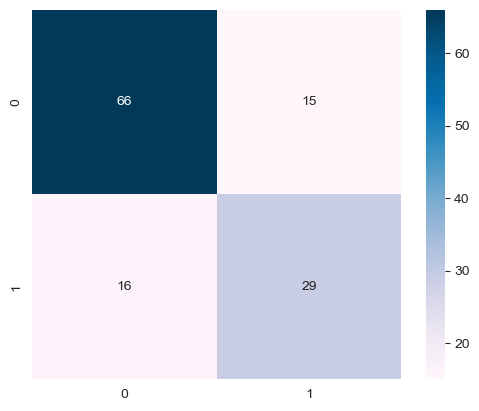

In [29]:
first_predictions = third_knn.predict(test_inputs)
confusion_matrix_ = confusion_matrix(test_target, first_predictions)

sns.heatmap(confusion_matrix_, annot=True, square=True, cmap='PuBu');

In [30]:
confusion_matrix(test_target, first_predictions)

array([[66, 15],
       [16, 29]], dtype=int64)

In [31]:
classification_report(test_target, first_predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81        81\n           1       0.66      0.64      0.65        45\n\n    accuracy                           0.75       126\n   macro avg       0.73      0.73      0.73       126\nweighted avg       0.75      0.75      0.75       126\n'

In [32]:
# ... will continue further.